## Updated Dataset: Ferguson et al. 2015

Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing.  

Source of data: https://www.zenodo.org/record/17794#.W5j7lBQnYYM

In [1]:
#https://pypi.org/project/pyabf/
import pyabf

all_files = ['PYR1.abf','PYR2.abf','PYR3.abf','PYR4.abf','PYR5_rebound.abf']

for f in all_files:
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file: %s"%abf)

    abf.setSweep(1) # sweeps start at 0

    print('Times info (%i points): %s'%(len(abf.sweepX),abf.sweepX)) # sweep times (seconds)
    print('Current info (%i points): %s'%(len(abf.sweepY),abf.sweepY)) # sweep data (ADC)



--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "cc10pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-23.4985 -25.0244  -4.5776 ... -10.0708 -15.2588 -10.0708]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "cc25pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-86.3647 -68.9697 -82.0923 ... -85.144  -81.7871 -75.9888]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "cc10pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current i

In [2]:
cells = ['Pyramidal cell 1, strongly adapting',
         'Pyramidal cell 2, strongly adapting',
         'Pyramidal cell 3, weakly adapting',
         'Pyramidal cell 4, weakly adapting',
         'Pyramidal cell 5, rebound firing']



--- Loaded file (PYR1.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "cc10pA1s".


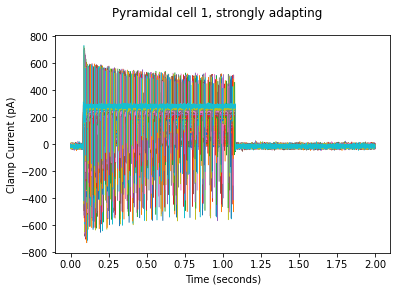

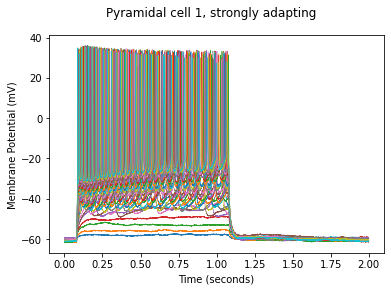

--- Loaded file (PYR2.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "cc25pA1s".


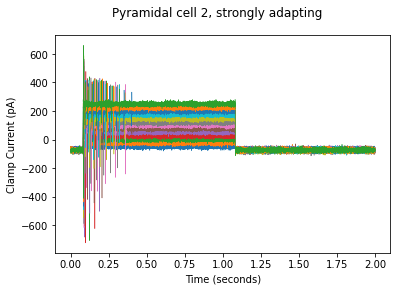

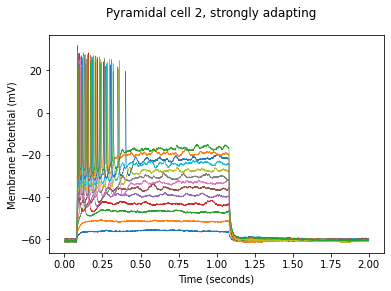

--- Loaded file (PYR3.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "cc10pA1s".


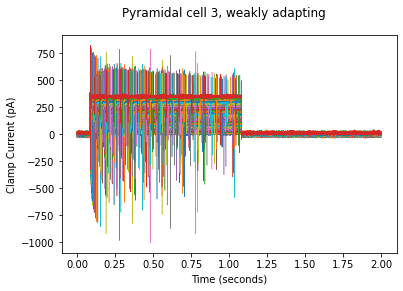

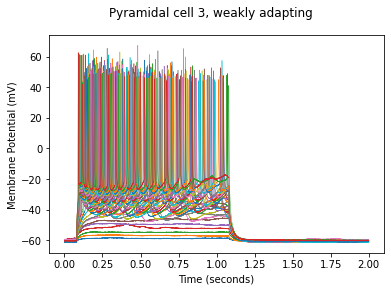

--- Loaded file (PYR4.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "cc10pA1s".


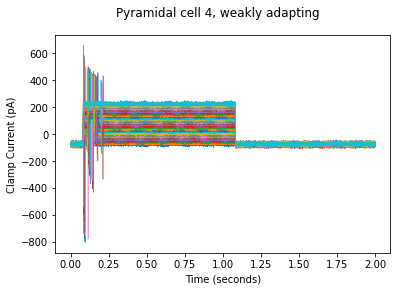

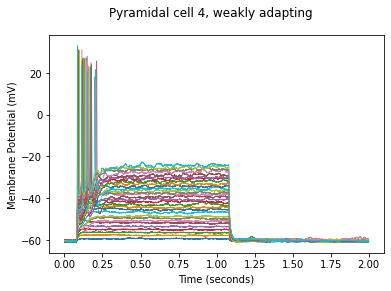

--- Loaded file (PYR5_rebound.abf): ABF (version 1.8.3.0) with 2 channels (nA, mV), sampled at 10.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.37 minutes, recorded with protocol "cc-25pA1s".


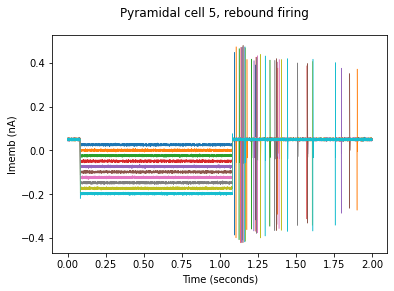

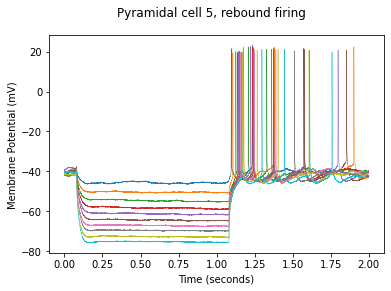

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  

for cell, f in zip(cells,all_files):
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file (%s): %s"%(f,abf))
    max = abf.sweepCount
    #max = 12

    for i in range(max):

        abf.setSweep(i, channel=0) # sweeps start at 0
        plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.suptitle(cell)
        #plt.legend()

    plt.show()

    for i in range(max):
        abf.setSweep(i, channel=1) # sweeps start at 0
        plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.suptitle(cell)
        #plt.legend()

    plt.show()


In [4]:
# example updates using only one file 
from datetime import datetime, tzinfo, timedelta
from dateutil.tz import tzlocal

import pynwb
import math
import platform
import numpy as np

# import example file
cell = cells[0]
f = all_files[0]
abf = pyabf.ABF(f)

In [5]:
# create main file elements
reference = f.split('.')[0]

create_date = datetime.now(tz=tzlocal())

import hdmf._version
hdmf_ver = 'v%s'%hdmf._version.get_versions()['version']

notes = 'NWB2 file with ephys created with pynwb v%s (HDMF %s) and Python %s' %(pynwb.__version__,hdmf_ver,platform.python_version())

print(notes)

NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6


In [21]:
date, time = abf.abfDateTimeString.split('T')

date = date.split('-')
time = time.split(':')

year, month, day = int(date[0]), int(date[1]), int(date[2])
hour, minute = int(time[0]), int(time[1])
sec = int(time[2].split('.')[0])

print(year, month) # not DST

# for McGill Uni in Montreal, Quebec
class TZ(tzinfo):
    def utcoffset(self, dt):
        return -timedelta(hours=4)
    def dst(self, dt):
        return timedelta(0)
    def tzname(self,dt):
        return "-04:00"
    def  __repr__(self):
        return f"{self.__class__.__name__}()"

start_time = datetime(year,month,day,hour,minute,sec,tzinfo=TZ())

2012 7


In [8]:
# greek unicode
ohm = '\u03A9'
micro = '\u03BC'


In [9]:
# subject-related elements
subject = pynwb.file.Subject(
    species='transgenic mouse',
    genotype='PV-tdTomato',
    sex='M/F', # unspecified in publication
    age='post-natal day 20-29'
    
)

protocol = abf.protocol

stim_notes='Depolarizing current steps, aCSF perfusion rate of 20-25 ml/min, temperature 30+/- 2 celsius'

nwbfile = pynwb.NWBFile(
                session_description='Ferguson et al. %s'%f,
                identifier='Ferguson et al. %s'%f,
                 session_start_time=start_time,
                 file_create_date=create_date,
                 notes=notes,
                 experimenter='Katie A. Ferguson',
                 experiment_description='Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing',
                 institution='University of Toronto',
                 lab='Skinner Lab',
                        
                # subject-related elements
                subject=subject,
                       
                # recording-related elements
                protocol=protocol,
                stimulus_notes=stim_notes,
                pharmacology='synaptic blockers: 5 %sM 6,7-dinitroquinoxaline-2,3-dione disodium salt(DNQX), 5 %sM  bicuculline and 25 %sM DL-2-amino-5-phosphonopentanoic acid sodium salt (DL-AP5) (Abcam, Toronto, Canada)'%(micro,micro,micro),
                keywords=['pyramidal cells','neuroscience','patch clamps']
        )



In [10]:
nwbfile

root pynwb.file.NWBFile at 0x140399401751376
Fields:
  experiment_description: Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing
  experimenter: ['Katie A. Ferguson']
  file_create_date: [datetime.datetime(2020, 6, 14, 23, 31, 33, 929471, tzinfo=tzlocal())]
  identifier: Ferguson et al. PYR1.abf
  institution: University of Toronto
  keywords: ['pyramidal cells' 'neuroscience' 'patch clamps']
  lab: Skinner Lab
  notes: NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
  pharmacology: synaptic blockers: 5 μM 6,7-dinitroquinoxaline-2,3-dione disodium salt(DNQX), 5 μM  bicuculline and 25 μM DL-2-amino-5-phosphonopentanoic acid sodium salt (DL-AP5) (Abcam, Toronto, Canada)
  protocol: cc10pA1s
  session_description: Ferguson et al. PYR1.abf
  session_start_time: 2012-07-27 13:18:43-04:00
  stimulus_notes: Depolarizing current steps, aCSF perfusion rate of 20-25 ml/min, temperature 30+

In [11]:
# device metadata
device = nwbfile.create_device(name='Axopatch-1C amplifier',
                               description='Axon Instruments and pClamp9 software',
                               manufacturer='Molecular Devices, Sunnyvale, CA')

# How can you add second device for recording software?

slice_prep = '~45 degree cut from surface'
location = 'pyramidal cell layer, middle portion of hippocampus (intermediate between septal and temporal poles of preparation)'



electrode = nwbfile.create_icephys_electrode(name='patch electrode',
                            description='Patch pipettes pulled from borosilicate glass capillaries (2.5-4 M%s)'%ohm,
                            slice=slice_prep,
                            location=location,
                            device=device,
)

In [12]:
electrode

patch electrode pynwb.icephys.IntracellularElectrode at 0x140399401750992
Fields:
  description: Patch pipettes pulled from borosilicate glass capillaries (2.5-4 MΩ)
  device: Axopatch-1C amplifier pynwb.device.Device at 0x140399401750608
  location: pyramidal cell layer, middle portion of hippocampus (intermediate between septal and temporal poles of preparation)
  slice: ~45 degree cut from surface

In [13]:
from pynwb.icephys import CurrentClampStimulusSeries

# file specific data + metadata
sweep = 0
channel = 0

current_step = 10.0

max_sweeps = abf.sweepCount

abf.setSweep(sweep,channel=channel) # channel 0 = clamp current channel


# add clamp current data
data = abf.sweepY
timestamps = abf.sweepX

unit = abf.adcUnits[channel]
print(unit)
conversion = 1e-12

# recording session
sweep_number = sweep 
rate = 1000.*abf.dataPointsPerMs # kHz -> Hz (specify this or timestamps)
interval = abf.dataLengthSec

inj_current = (sweep + 1.) * current_step
description = 'Sweep %i, applied current (pulse ~%s pA)'%(sweep,inj_current)

gain = np.nan

csss = CurrentClampStimulusSeries(
                 name='%s, Sweep_%i'%(cell,sweep),
                 description=description,
                 stimulus_description=protocol + ' protocol',
                 sweep_number=sweep_number,
    
                 data=data,
                 timestamps=timestamps,
                 unit='amperes',
                 conversion=conversion,

                 electrode=electrode,
                 gain=gain,
    
                 comments='Extracted from ABF file: %s'%f,
)



pA


In [14]:
csss #why is interval an output, but their is no input parameter for this?

Pyramidal cell 1, strongly adapting, Sweep_0 pynwb.icephys.CurrentClampStimulusSeries at 0x140398391428112
Fields:
  comments: Extracted from ABF file: PYR1.abf
  conversion: 1e-12
  data: [-12.8174 -15.2588 -12.207  ... -14.3433  -7.019   -9.1553]
  description: Sweep 0, applied current (pulse ~10.0 pA)
  electrode: patch electrode pynwb.icephys.IntracellularElectrode at 0x140399401750992
Fields:
  description: Patch pipettes pulled from borosilicate glass capillaries (2.5-4 MΩ)
  device: Axopatch-1C amplifier pynwb.device.Device at 0x140399401750608
  location: pyramidal cell layer, middle portion of hippocampus (intermediate between septal and temporal poles of preparation)
  slice: ~45 degree cut from surface

  gain: nan
  interval: 1
  resolution: -1.0
  stimulus_description: cc10pA1s protocol
  sweep_number: 0
  timestamps: [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
  timestamps_unit: seconds
  unit: amperes

In [15]:
from pynwb.icephys import CurrentClampSeries

# file specific data + metadata
sweep = 0
channel = 1

max_sweeps = abf.sweepCount

abf.setSweep(sweep,channel=channel) # channel 1 = voltage response


# add voltage data
data = abf.sweepY
timestamps = abf.sweepX

unit = abf.adcUnits[channel]
print(unit)
conversion = 1e-3

# recording session
sweep_number = sweep 
interval = abf.dataLengthSec

inj_current = (sweep + 1.) * current_step
description = 'Sweep %i, membrane potential response (to pulse ~%s pA)'%(sweep,inj_current)

gain = np.nan

css = CurrentClampSeries(
                 name='%s, Sweep_%i'%(cell,sweep),
                 description=description,
                 stimulus_description=protocol + ' protocol',
                 sweep_number=sweep_number,
    
                 data=data,
                 timestamps=timestamps,
                 unit='volts',
                 conversion=conversion,

                 electrode=electrode,
                 gain=gain,
    
                 comments='Estimated junction potential: -15.2 mV, Extracted from ABF file: %s'%f,
)



mV


In [16]:
css

Pyramidal cell 1, strongly adapting, Sweep_0 pynwb.icephys.CurrentClampSeries at 0x140398391754832
Fields:
  comments: Estimated junction potential: -15.2 mV, Extracted from ABF file: PYR1.abf
  conversion: 0.001
  data: [-60.2112 -60.1807 -60.2112 ... -60.4858 -60.4553 -60.4248]
  description: Sweep 0, membrane potential response (to pulse ~10.0 pA)
  electrode: patch electrode pynwb.icephys.IntracellularElectrode at 0x140399401750992
Fields:
  description: Patch pipettes pulled from borosilicate glass capillaries (2.5-4 MΩ)
  device: Axopatch-1C amplifier pynwb.device.Device at 0x140399401750608
  location: pyramidal cell layer, middle portion of hippocampus (intermediate between septal and temporal poles of preparation)
  slice: ~45 degree cut from surface

  gain: nan
  interval: 1
  resolution: -1.0
  stimulus_description: cc10pA1s protocol
  sweep_number: 0
  timestamps: [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
  timestamps_unit: seconds
  unit: volts

In [17]:
nwbfile.add_stimulus(csss)
nwbfile.add_acquisition(css)

In [18]:
nwbfile

root pynwb.file.NWBFile at 0x140399401751376
Fields:
  acquisition: {
    Pyramidal cell 1, strongly adapting, Sweep_0 <class 'pynwb.icephys.CurrentClampSeries'>
  }
  devices: {
    Axopatch-1C amplifier <class 'pynwb.device.Device'>
  }
  experiment_description: Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing
  experimenter: ['Katie A. Ferguson']
  file_create_date: [datetime.datetime(2020, 6, 14, 23, 31, 33, 929471, tzinfo=tzlocal())]
  icephys_electrodes: {
    patch electrode <class 'pynwb.icephys.IntracellularElectrode'>
  }
  identifier: Ferguson et al. PYR1.abf
  institution: University of Toronto
  keywords: ['pyramidal cells' 'neuroscience' 'patch clamps']
  lab: Skinner Lab
  notes: NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
  pharmacology: synaptic blockers: 5 μM 6,7-dinitroquinoxaline-2,3-dione disodium salt(DNQX), 5 μM  bicuculline and 25 μM DL-2-amino-5-phos

In [19]:
nwb_file_name = 'FergusonEtAl2015_%s.nwb'%reference
io = pynwb.NWBHDF5IO(nwb_file_name, mode='w')
io.write(nwbfile)
io.close()
print("Written NWB file to %s"%nwb_file_name)

/home/vrhaynes/tools/anaconda3/envs/nwb_env/lib/python3.7/site-packages/hdmf/build/objectmapper.py:146: UserWarning: Value with data type int64 is being converted to data type uint64 (min specification: uint32).
  % (g.name, ret_type.name, s.name))


Written NWB file to test_FergusonEtAl2015_PYR1.nwb


In [20]:
nwb_file_name

'test_FergusonEtAl2015_PYR1.nwb'

In [23]:
import sys
sys.path.append("../NWB")

import nwb_info

nwb_info.print_info('FergusonEtAl2015_PYR2.nwb')

NWB info
  Info on Python (v3.7.6) packages:
    PIL                 (installed: v7.1.2)
    av                  (installed: ???)
    dateutil            (installed: v2.8.1)
    h5py                (installed: ???)
    hdf5                (installed: ???)
    hdmf                (installed: v1.6.1)
    imageio             (installed: v2.8.0)
    numpy               (installed: v1.18.1)
    pandas              (installed: v1.0.3)
    pillow              (installed: ???)
    pyabf               (installed: v2.2.4)
    pynwb               (installed: v1.3.0)
    scipy               (installed: v1.4.1)
    six                 (installed: v1.14.0)
    tifffile            (installed: v2020.6.3)

Info on FergusonEtAl2015_PYR2.nwb (5009416 bytes; modified: Sun Jun 14 23:01:46 2020)
    Attr   .specloc =	 <HDF5 object reference>
    Attr   namespace =	 core
    Attr   neurodata_type =	 NWBFile
    Attr   nwb_version =	 2.2.2
    Attr   object_id =	 70b5641f-fb56-4560-8f13-18e6ce91a1e8
    Field

Successfully opened file with pynwb v1.3.0
    name = root
    notes = NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
    subject = None
    experimenter = ('Katie A. Ferguson',)
Notes: NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
Finished looking at file FergusonEtAl2015_PYR2.nwb


root pynwb.file.NWBFile at 0x140398382550352
Fields:
  acquisition: {
    Sweep_0 <class 'pynwb.base.TimeSeries'>,
    Sweep_1 <class 'pynwb.base.TimeSeries'>,
    Sweep_2 <class 'pynwb.base.TimeSeries'>,
    Sweep_3 <class 'pynwb.base.TimeSeries'>,
    Sweep_4 <class 'pynwb.base.TimeSeries'>,
    Sweep_5 <class 'pynwb.base.TimeSeries'>,
    Sweep_6 <class 'pynwb.base.TimeSeries'>,
    Sweep_7 <class 'pynwb.base.TimeSeries'>,
    Sweep_8 <class 'pynwb.base.TimeSeries'>,
    Sweep_9 <class 'pynwb.base.TimeSeries'>
  }
  experiment_description: Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing
  experimenter: ['Katie A. Ferguson']
  file_create_date: [datetime.datetime(2020, 6, 14, 23, 1, 44, 660401, tzinfo=tzoffset(None, -25200))]
  identifier: Ferguson et al. PYR2.abf
  institution: University of Toronto
  notes: NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
  session_descripti